# IOAI-HW1-practical

Full Name: Reyhane Khayatzade-Mahani

Student ID: 402105965


## Q1: Image Processing (20 Points)

# Introduction 

In this exercise, we are going to examine two applications of the basis shift tools that were discussed in class (SVD and FFT) in digital image processing.


One of the issues we are investigating is image compression. For this purpose, in general, the information inside the image can be considered as a data matrix, then, in a way, suitable bases for this information matrix are found. The primary image is displayed with less information by depicting the primary matrix on a more important basis and keeping the necessary information. Data and compression in practice. For the sake of simplicity, the images we are considering in this exercise are considered black and white. Still, the methods under consideration can be implemented simply and by changing the shape of the tensors of multi-channel (color) images.


With the help of SVD, we can find bases for the column space of the matrix of our desired image on which the columns of our image have the highest correlation. From the point of view of these bases in the descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only $r$ initial columns of the found bases ($U$) along with the combined vectors ($V^T$) and singular values ($\Sigma$) corresponding to them, we can keep a good approximation of the general image. From the expert point of view, the reconstruction that has been done is actually a kind of reconstruction of the primary matrix in the lower order (rank approximation) that you were familiar with before. The amount of

In this view, $r$ is the control valve for the amount of compression we want.


With the help of FFT and Fourier transform, we can also consider the information in the rows and columns of our image matrix as two-dimensional discrete signal values and image it in the space of two-dimensional fundamental and periodic wave bases. It can be shown that the larger size of the image vector in the direction of a certain wave means the greater importance of that wave in the formation of patterns in the image ([Read more](https://en.wikipedia.org/wiki/Parseval%27s_identity)), so keeping $r$ of the basic wave in which the size of the image vector is the largest in their direction can be used to reconstruct the image information. For image compression, a good approximation should be used. In this view, the $r$ value of the control valve will be the compression rate we want.


Another issue that we can explore with a similar idea of applying the described base transform is image denoising. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image, from the point of view of SVD, according to the examination of the general information, the direction of the image vector based on bases with more singular values has not changed much, and the information related to the vectors having less importance can remove noise and keep the original information of the image. From the point of view of FFT, considering that the noise pattern is generally modeled with high-frequency waves, keeping the constitutive waves containing the lower frequency in the image can separate the image information from the noise (this is called low-pass filtering).

## 0. Prerequisites and Imports

Install the required packages (if not already installed):

In [1]:
!pip install numpy 
!pip install matplotlib
!pip install pillow 


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import PIL 
from PIL import Image

# Display inputs

In the following cell, you have to display the images. The input images are in the directory of `./images`.

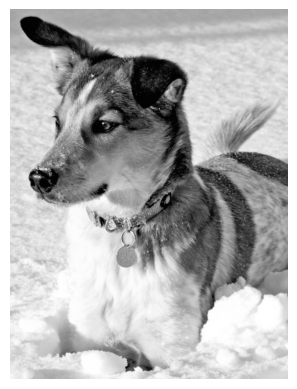

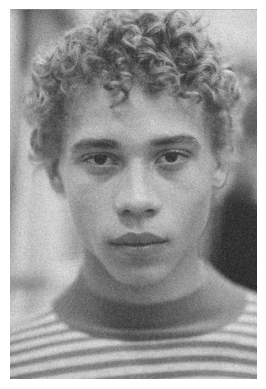

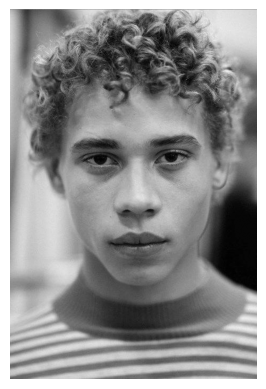

In [24]:
for img_name in ["dog", "noisy", "original"]:
    img = Image.open(f"./images/{img_name}.jpg").convert("L")
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.show()

# 1. Image Compression
Using SVD (you can use `np.linalg.svd`) and 2D-FFT (which will be explained in details later), Compress the `original.jpg` image with compression rates of $0.1$, $0.5$, $1$, $5$ and $10$%. Then visualize the resulting compressed images of the two algorithms against one another and investigate each basis change's effectiveness in capturing more meaningful patterns of images.

The 2D Fourier transform of a data matrix can be achieved by ﬁrst applying the 1D Fourier transform to every row of the matrix, and then applying the 1D Fourier transform to every column of the intermediate matrix. This process is depicted below. `np.fft.fft2` applys a 2D Fourier transformation to the provided matrix by employing the Fast Fourier Transformation algorithm.

<img style="margin: auto;" width="45%" src="./samples/2dfft.png">

The Fourier coefficients are zero-centered by definition, and although it does not affect the result of the transformation followed by its inverse, in general, it is more convenient to have them centered around the middle point of the transformation matrix. `np.fft.fftshift` does the described shift two a provided Discrete-Fourier transformation matrix.

Your results may look as follows:

<img style="margin: auto;" width="80%" src="./samples/compression.jpg">

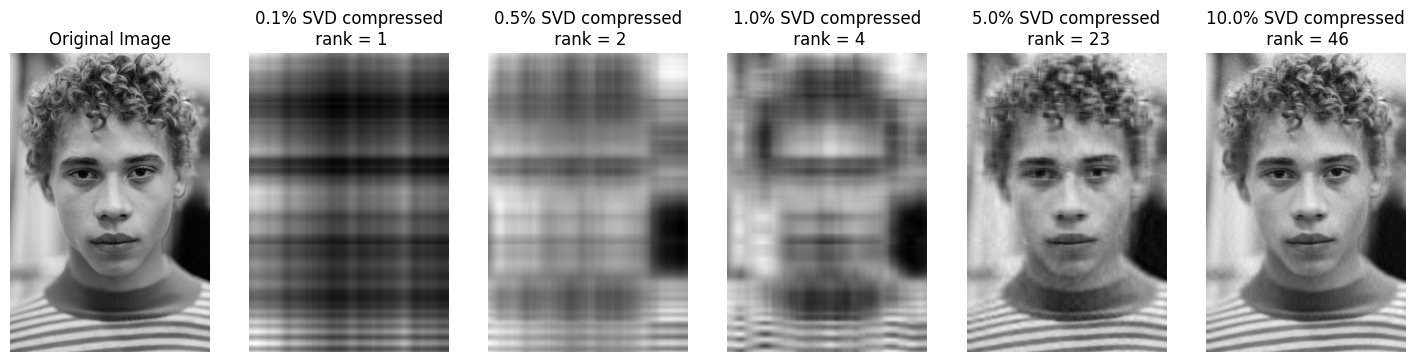

In [47]:
# use svd with different compress rates and display each output result

# Load Image
img = Image.open("./images/original.jpg").convert("L")
# Convert it to a matrix
A = np.array(img, dtype=np.float32)

# Perform SVD
U, S, VT = np.linalg.svd(A)


m, n = A.shape
max_rank = min(m ,n)


rates = [1, 0.001, 0.005, 0.01, 0.05, 0.1]

# Prepare the plots
fig, imgs = plt.subplots(1, 6, figsize=(18, 4))


for i, r in enumerate(rates):
    k = max(1, int(r * max_rank))
    Ak = U[:, :k] @ np.diag(S[:k]) @ VT[:k, :]

    # Add image to plots
    imgs[i].imshow(Ak, cmap="gray")
    imgs[i].axis("off")
    if i != 0:
        imgs[i].set_title(f"{r * 100}% SVD compressed\n rank = {k}")
    else:
        imgs[i].set_title("Original Image")


plt.show()


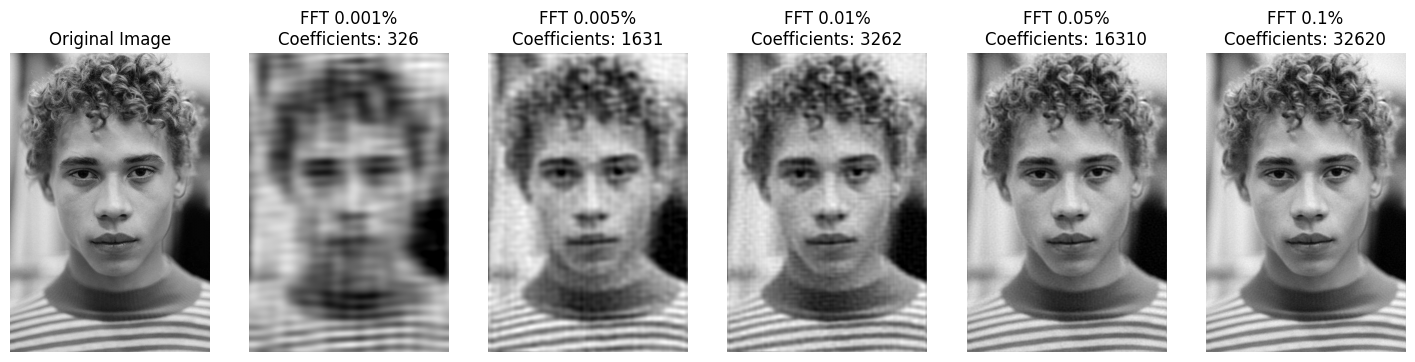

In [109]:
img = Image.open("./images/original.JPG").convert("L")
A = np.array(img, dtype=np.float32) / 255
m, n = A.shape
N = m * n

rates = [1, 0.001, 0.005, 0.01, 0.05, 0.1]

FFT = np.fft.fft2(A)
FFT_shifted = np.fft.fftshift(FFT)

fig, axes = plt.subplots(1, 6, figsize=(18, 4))

for i, r in enumerate(rates):
    k = max(1, int(round(r * N))) 

    magnitudes = np.abs(FFT_shifted).ravel()
    thresh = np.partition(magnitudes, -k)[-k]
    mask = (np.abs(FFT_shifted) >= thresh)
    Fk = FFT_shifted * mask

    Ak = np.fft.ifft2(np.fft.ifftshift(Fk)).real
    Ak = np.clip(Ak, 0.0, 1.0)

    ax = axes[i]
    ax.imshow(Ak, cmap='gray')
    if (i == 0):
        ax.set_title("Original Image")
    else:
        ax.set_title(f"FFT {r}%\nCoefficients: {k}")
    ax.axis('off')

plt.show()


Which change of basis seems to do better when it comes to image compression? Briefly elaborate on what makes that change of basis more suited for images?

Text here

# 2. Image Denoising

Through the same process as the previous section and by empirically finding an optimal rank threshold for the SVD vectors, denoise the provided image. Your results may look as follows:

<img style="margin: auto;" width="80%" src="./samples/svdd.jpg">

It is shown that SVD can be an effective denoising strategy when the underlying data is of low rank initially, but as observable from the example, raw SVD does not seem to be useful when it comes to denoising natural images.

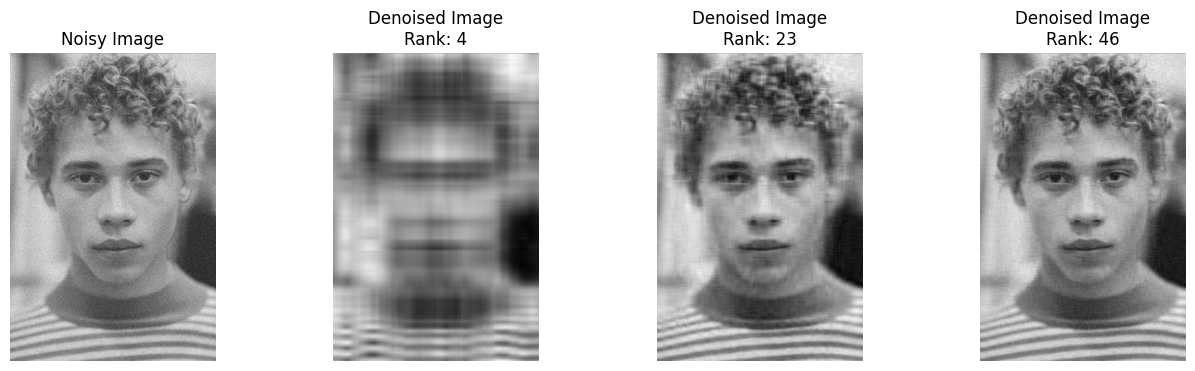

In [110]:
# Using SVD, denoise the noisy image that is in the images directory. 
# You have to try at least 3 different ranks. 
img = Image.open("./images/noisy.jpg").convert("L")
A = np.array(img, dtype=np.float32)
m, n = A.shape
max_rank = min(m, n)

U, S, VT = np.linalg.svd(A)

rates = [1, 0.01, 0.05, 0.1]

fig, imgs = plt.subplots(1, 4, figsize=(16, 4))


for i, r in enumerate(rates):
    k = max(1, int(r * max_rank))

    Ak = U[:, :k] @ np.diag(S[:k]) @ VT[:k, :]

    imgs[i].imshow(Ak, cmap="gray")
    imgs[i].axis("off")
    if i == 0:
        imgs[i].set_title("Noisy Image")
    else:
        imgs[i].set_title(f"Denoised Image\nRank: {k}")


The FFT is extensively used for denoising and filtering signals, as it is straightforward to isolate and manipulate particular frequency bands. It is observed that the noise is especially pronounced in high-frequency modes, therefore zero out any Fourier coefﬁcient outside of a radius containing low frequencies. You can find the approximate optimal filtering radius through trials and errors empirically. A sample denoised image is shown below:

<img style="margin: auto;" width="50%" src="./samples/fftd.jpg">

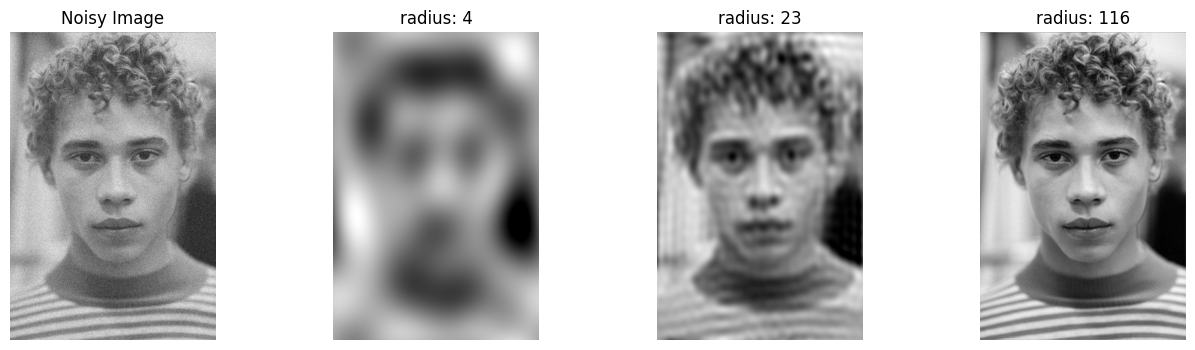

In [126]:
base = min(m, n) / 2.0
radiuses = [0, 0.02 * base, 0.1 * base, 0.5 * base]

yy, xx = np.ogrid[:m, :n]
cy, cx = m / 2.0, n / 2.0
dist2 = (yy - cy) ** 2 + (xx - cx) ** 2

fig, axes = plt.subplots(1, 4, figsize=(16, 4))


for i, r in enumerate(radiuses):
    if i == 0:
        axes[i].imshow(A, cmap='gray')
        axes[i].set_title("Noisy Image")
    else:
        mask = dist2 <= (r**2)
        Fk = FFT_shifted * mask
        Ak = np.fft.ifft2(np.fft.ifftshift(Fk)).real
        Ak = np.clip(Ak, 0.0, 1.0)
        axes[i].imshow(Ak, cmap='gray')
        axes[i].set_title(f"radius: {int(r)}")

    axes[i].axis('off')

plt.show()


# Q2 — Z-Transform (20 points)

Consider the following difference equation of a discrete-time system:

$$
y[n] - 0.5\,y[n-1] + 0.25\,y[n-2] = x[n] + 2\,x[n-1] + x[n-3]
$$

---

### (a)
Without using the Z-transform, find and plot the **impulse response** of the system for  

$$
0 \le n \le 100
$$  

(You may use the **recursive method** to compute it.)

---

### (b)
Using the **Z-transform**, find the **impulse response** again and discuss the **stability** of the system.

---

### (c)
Using the Z-transform, determine the **system response** to the following input:

$$
x[n] = \big( 5 + 3\cos(0.2\pi n) + 4\sin(0.6\pi n) \big)u[n]
$$

where $u[n]$ is the **unit step function**.

---

### (d)
Plot the **magnitude response** of the system over the frequency range  

$$
\omega \in [-\pi, \pi].
$$

---

### (e)
Plot the **phase response** of the system over the range  

$$
\omega \in [-\pi, \pi].
$$  

Draw it once as a **continuous** function and once **wrapped** within the interval $[-\pi, \pi]$.

---

### (f)
Find the **zeros** and **poles** of the system and plot the **pole-zero diagram**.

---

In [21]:
#####################################################
#                                                   #
#                  Code here                        #
#                                                   #
#####################################################
# ============================================================
# Problem 9 — Z-Transform System Analysis
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# System difference equation coefficients:
#   y[n] - 0.5 y[n-1] + 0.25 y[n-2] = x[n] + 2x[n-1] + x[n-3]
# → H(z) = (1 + 2z⁻¹ + z⁻³) / (1 - 0.5z⁻¹ + 0.25z⁻²)
b = [1, 2, 0, 1]          # numerator coefficients
a = [1, -0.5, 0.25]       # denominator coefficients


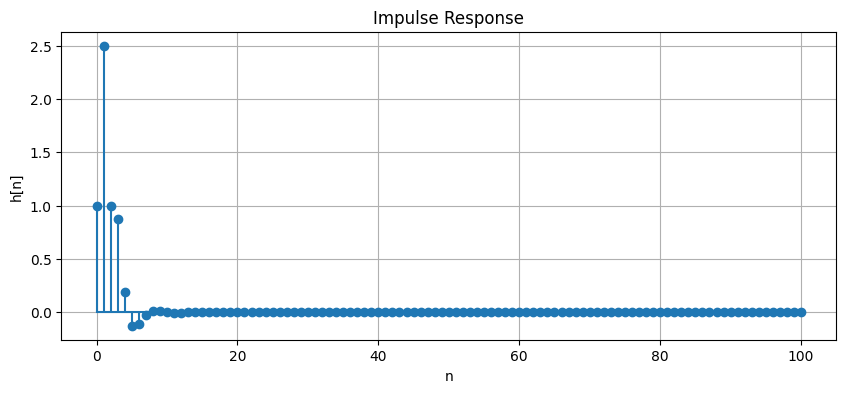

In [20]:
N = 101

# Initialize the Impulse signal
x = np.zeros(N)
x[0] = 1 

y = np.zeros(N)

#   y[n] = 0.5 y[n-1] - 0.25 y[n-2] + x[n] + 2x[n-1] + x[n-3]
# Also check boundries for negative time (Initial Rest)
for n in range(N):
    y[n] = (0.5*y[n-1] if n-1 >= 0 else 0) - (0.25*y[n-2] if n-2 >= 0 else 0) + x[n] + (2*x[n-1] if n-1 >= 0 else 0) + (x[n-3] if n-3 >= 0 else 0)



# Plot the inpulse response
plt.figure(figsize=(10,4))
plt.stem(np.arange(N), y, markerfmt='o', basefmt='')
plt.title("Impulse Response")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.grid(True)

plt.show()

Poles: [0.25+0.4330127j 0.25-0.4330127j]
Zeros: [-2.20556943+0.j          0.10278472+0.66545695j  0.10278472-0.66545695j]
Poles magnitude: [0.5 0.5]
System is stable? True


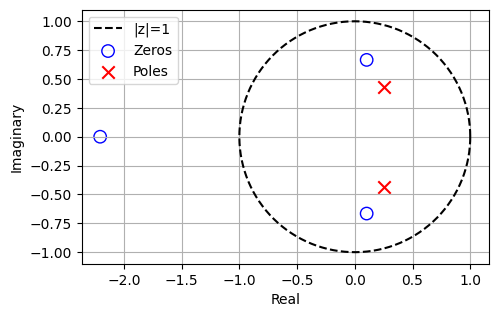

In [41]:
poles = np.roots(a)
zeros = np.roots(b)

poles_magnitude = np.abs(poles)

print(f"Poles: {poles}")
print(f"Zeros: {zeros}")

# Is every pole inside the unit circle?
print(f"Poles magnitude: {poles_magnitude}")
print(f"System is stable? {np.all(poles_magnitude < 1)}")


theta = np.linspace(0, 2*np.pi, 512)
unit_circle = np.exp(1j*theta)

plt.figure(figsize=(5, 5))
plt.plot(unit_circle.real, unit_circle.imag, 'k--', label='|z|=1')
plt.scatter(zeros.real, zeros.imag, facecolors='none', edgecolors='b', s=80, label='Zeros')
plt.scatter(poles.real, poles.imag, c='r', marker='x', s=80, label='Poles')
plt.gca().set_aspect('equal', 'box')


plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

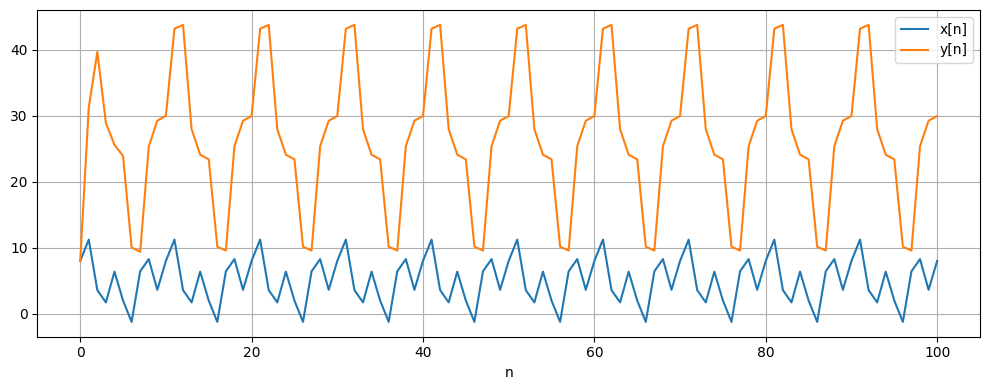

In [59]:
n = np.arange(N)
x = (5 + 3 * np.cos(0.2 * np.pi * n) + 4 * np.sin(0.6 * np.pi * n)) * (n >= 0)


y = signal.lfilter(b, a, x)


# Plot both input & output signals
plt.figure(figsize=(10,4))
plt.plot(n, x, label='x[n]')
plt.plot(n, y, label='y[n]')
plt.xlabel('n')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

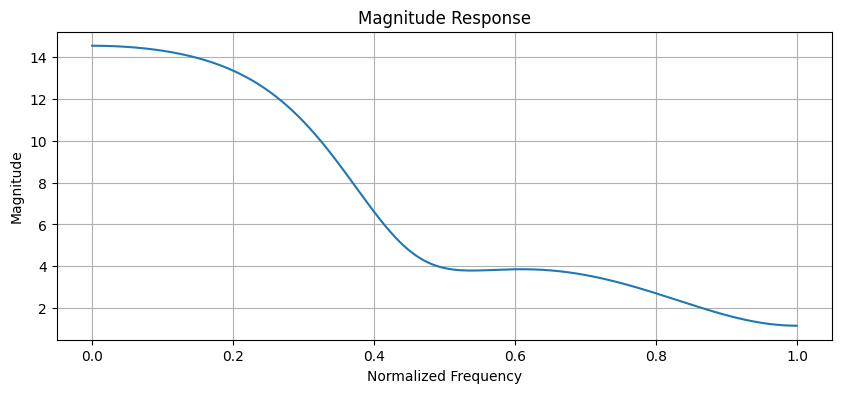

In [61]:
w, H = signal.freqz(b, a, worN=1024)

H_dB = 20 * np.log10(np.abs(H))

plt.figure(figsize=(10,4))
plt.plot(w/np.pi, H_dB)
plt.title('Magnitude Response')
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


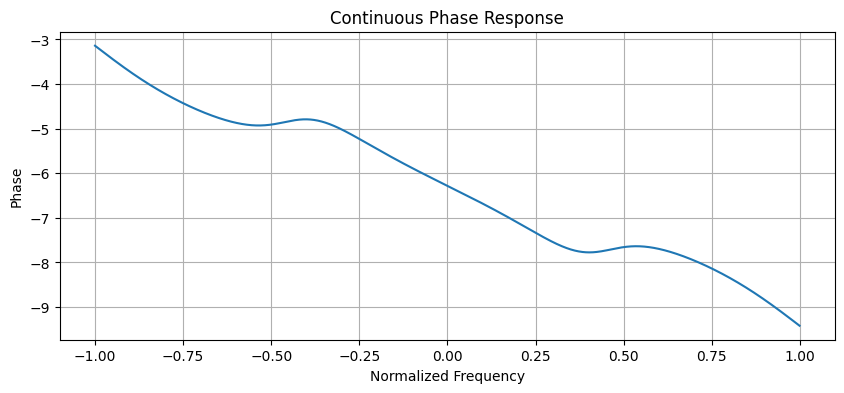

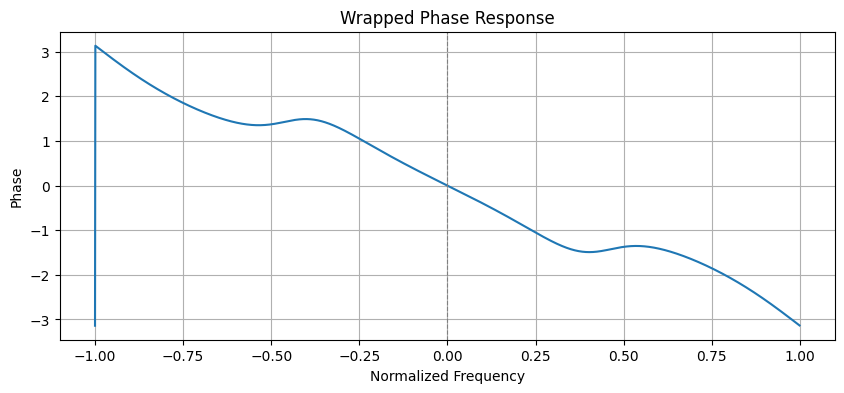

In [64]:
w, H = signal.freqz(b, a, worN=2048, whole=True)
w_shift = w - np.pi
H_shift = np.fft.fftshift(H)

phase_wrapped = np.angle(H_shift)
phase_unwrapped = np.unwrap(phase_wrapped)

# Unwrapped phase
plt.figure(figsize=(10,4))
plt.plot(w_shift/np.pi, phase_unwrapped)
plt.title('Continuous Phase Response')
plt.xlabel('Normalized Frequency')
plt.ylabel('Phase')
plt.grid(True)
plt.show()

# Wrapped phase 
plt.figure(figsize=(10,4))
plt.plot(w_shift/np.pi, phase_wrapped)
plt.title('Wrapped Phase Response')
plt.xlabel('Normalized Frequency')
plt.ylabel('Phase')
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(True)
plt.show()


Poles: [0.25+0.4330127j 0.25-0.4330127j]
Zeros: [-2.20556943+0.j          0.10278472+0.66545695j  0.10278472-0.66545695j]
Poles magnitude: [0.5 0.5]
System is stable? True


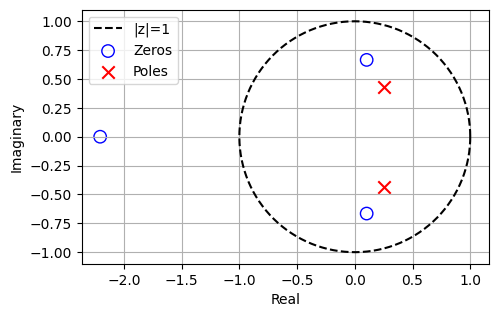

In [66]:
poles = np.roots(a)
zeros = np.roots(b)

poles_magnitude = np.abs(poles)

print(f"Poles: {poles}")
print(f"Zeros: {zeros}")

# Is every pole inside the unit circle?
print(f"Poles magnitude: {poles_magnitude}")
print(f"System is stable? {np.all(poles_magnitude < 1)}")


theta = np.linspace(0, 2*np.pi, 512)
unit_circle = np.exp(1j*theta)

plt.figure(figsize=(5, 5))
plt.plot(unit_circle.real, unit_circle.imag, 'k--', label='|z|=1')
plt.scatter(zeros.real, zeros.imag, facecolors='none', edgecolors='b', s=80, label='Zeros')
plt.scatter(poles.real, poles.imag, c='r', marker='x', s=80, label='Poles')
plt.gca().set_aspect('equal', 'box')


plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Q3-Low-Pass and High-Pass Filter Analysis (20 points)

This problem explores the design and behavior of **discrete-time filters** using both theoretical and computational approaches.

---

### (a)
Design a **first-order low-pass filter** with a cutoff frequency of  
$$
\omega_c = 0.3\pi
$$  
and a **sampling frequency** of $f_s = 1$ (normalized frequency).

The difference equation of the filter is given by:

$$
y[n] = (1 - \alpha)x[n] + \alpha y[n-1],
$$

where $\alpha$ controls the cutoff frequency.

- Derive the expression for the **frequency response** $H(e^{j\omega})$.  
- Compute the value of $\alpha$ corresponding to $\omega_c = 0.3\pi$.

---

### (b)
Plot the **magnitude** and **phase** response of the designed low-pass filter over  
$$
\omega \in [0, \pi].
$$

Use Python code (e.g., `scipy.signal.freqz`) to verify your result.

---

### (c)
Now design a **first-order high-pass filter** using the relation:

$$
y[n] = (1 - \alpha)x[n] - (1 - \alpha)x[n-1] + \alpha y[n-1].
$$

- Derive its **frequency response**.  
- Plot and compare it to the low-pass filter response.

---

### (d)
Apply both filters to the following input signal:

$$
x[n] = \sin(0.2\pi n) + 0.5\sin(0.8\pi n), \quad 0 \le n \le 100.
$$

Plot:
1. The input signal  
2. The low-pass output  
3. The high-pass output  

Discuss which frequency components are preserved or attenuated by each filter.

---

### (e)
(Optional) Plot the **pole-zero diagrams** of both filters and discuss their **stability** and **filter type** (recursive / non-recursive).

---

Cutoff frequency wc = 0.942 rad/sample
Computed alpha = 0.3897


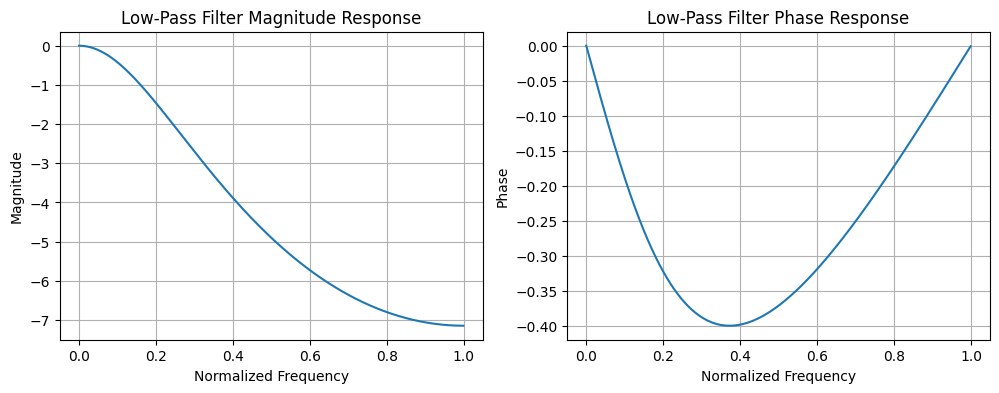

In [71]:
wc = 0.3 * np.pi      
fs = 1.0              

alpha = np.exp(-wc)   
print(f"Cutoff frequency wc = {wc:.3f} rad/sample")
print(f"Computed alpha = {alpha:.4f}")

b_lowpass = [1 - alpha]
a_lowpass = [1, -alpha]

# Frequency response
w, H = signal.freqz(b_lowpass, a_lowpass, worN=1024)
H_dB = 20 * np.log10(np.maximum(np.abs(H), 1e-10))
phase = np.angle(H)

fig, (fig1, fig2) = plt.subplots(1, 2, figsize=(12, 4))

# Magnitude
fig1.plot(w / np.pi, H_dB)
fig1.set_title('Low-Pass Filter Magnitude Response')
fig1.set_xlabel('Normalized Frequency')
fig1.set_ylabel('Magnitude')
fig1.grid(True)

# Phase
fig2.plot(w / np.pi, phase)
fig2.set_title('Low-Pass Filter Phase Response')
fig2.set_xlabel('Normalized Frequency')
fig2.set_ylabel('Phase')
fig2.grid(True)

plt.show()


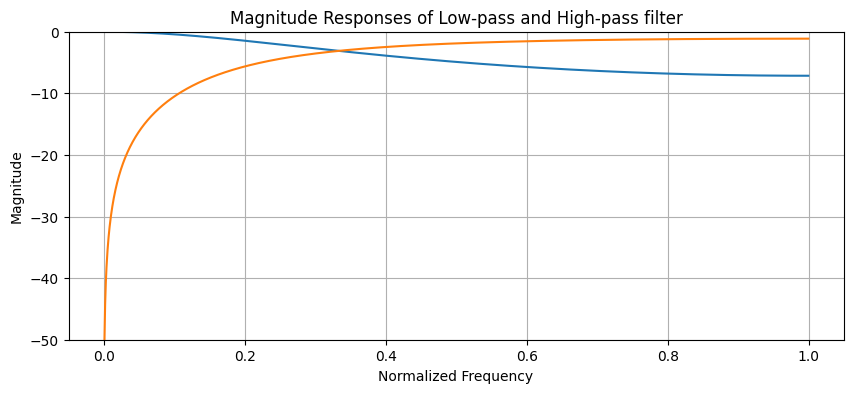

In [84]:
# Coefficients for the high-pass filter
b_highpass = [(1 - alpha), -(1 - alpha)]
a_highpass = [1, -alpha]

# Frequency response
w, H_lp = signal.freqz(b_lowpass, a_lowpass, worN=2048)
w2,  H_hp = signal.freqz(b_highpass, a_highpass, worN=2048)

h_lowpass_dB = 20*np.log10(np.maximum(np.abs(H_lp), 1e-10))
h_highpass_dB = 20*np.log10(np.maximum(np.abs(H_hp), 1e-10))


plt.figure(figsize=(10, 4))
plt.plot(w/np.pi, h_lowpass_dB, label='Low-Pass')
plt.plot(w/np.pi, h_highpass_dB, label='High-Pass')
plt.title('Magnitude Responses of Low-pass and High-pass filter')
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude')
plt.ylim(-50, 0) 
plt.grid(True)
plt.show()


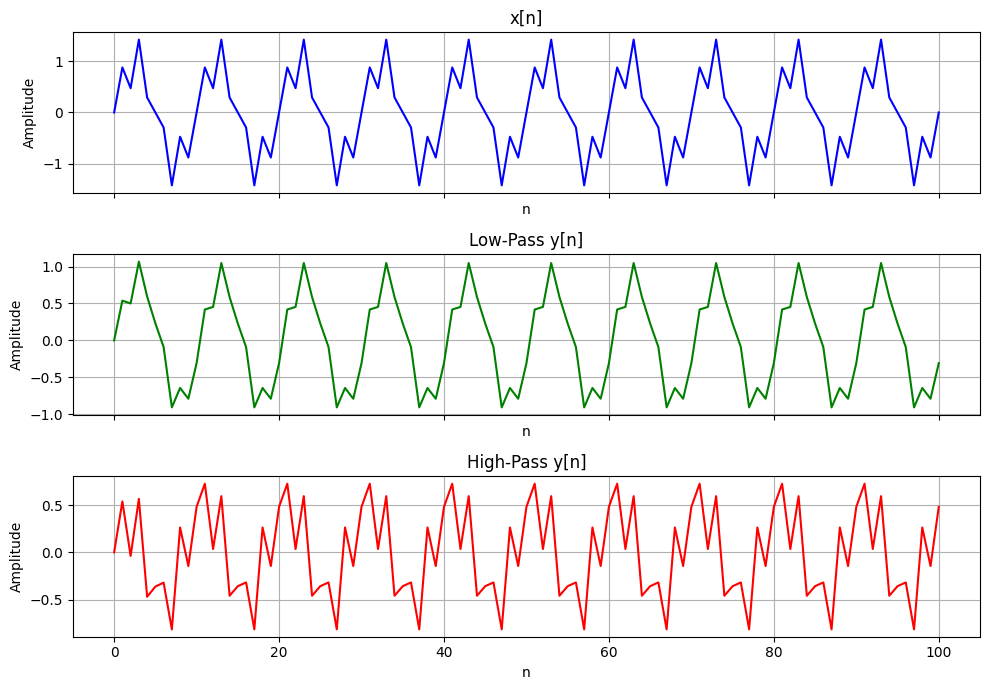

In [88]:
# Initialize input signal 
N = 101
n = np.arange(N)
x = np.sin(0.2 * np.pi *n) + 0.5 * np.sin(0.8 * np.pi * n)

# Filter
y_lowpass = signal.lfilter(b_lowpass, a_lowpass, x)
y_highpass = signal.lfilter(b_highpass, a_highpass, x)

fig, axs = plt.subplots(3, 1, figsize=(10, 7), sharex=True)

axs[0].plot(n, x, color='blue')
axs[0].set_title('x[n]')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlabel('n')
axs[0].grid(True)

axs[1].plot(n, y_lowpass, color='green')
axs[1].set_title('Low-Pass y[n]')
axs[1].set_ylabel('Amplitude')
axs[1].set_xlabel('n')
axs[1].grid(True)

axs[2].plot(n, y_highpass, color='red')
axs[2].set_title('High-Pass y[n]')
axs[2].set_xlabel('n')
axs[2].set_ylabel('Amplitude')
axs[2].grid(True)

plt.tight_layout()
plt.show()


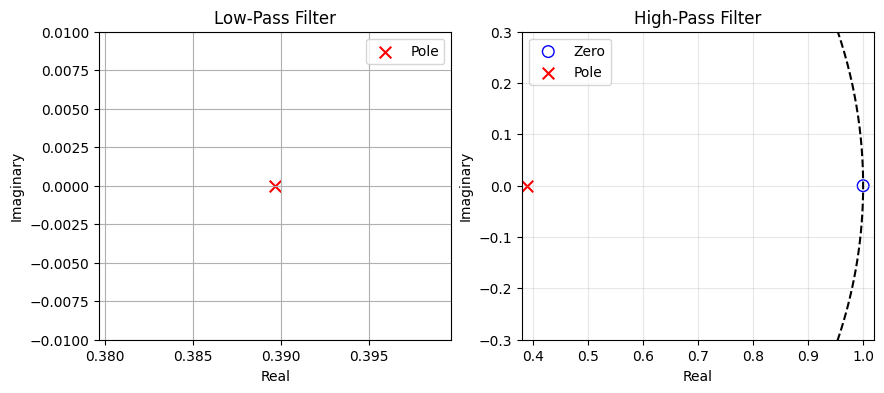

In [101]:
# Low Pass filter
poles_lowpass = np.array([alpha])
zeros_lowpass= np.array([])

# High pass filter
poles_highpass = np.array([alpha])
zeros_highpass = np.array([1.0])

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Low Pass
axs[0].scatter(poles_lowpass.real, poles_lowpass.imag, c='r', marker='x', s=70, label='Pole')
axs[0].set_title('Low-Pass Filter')
axs[0].set_xlabel('Real')
axs[0].set_ylabel('Imaginary')
axs[0].grid(True)
axs[0].set_xlim(alpha-0.01, alpha+0.01)
axs[0].set_ylim(-0.01, 0.01)
axs[0].legend()

# High Pass
uc = np.exp(1j * np.linspace(-0.35, 0.35, 200))
axs[1].plot(uc.real, uc.imag, 'k--')           
axs[1].scatter(zeros_highpass.real, zeros_highpass.imag, facecolors='none', edgecolors='b', s=70, label='Zero')
axs[1].scatter(poles_highpass.real, poles_highpass.imag, c='r', marker='x', s=70, label='Pole')
axs[1].set_title('High-Pass Filter')
axs[1].set_xlabel('Real'); axs[1].set_ylabel('Imaginary')
axs[1].grid(True, alpha=0.3)
axs[1].set_xlim(0.38, 1.02)
axs[1].set_ylim(-0.3, 0.3)
axs[1].legend()

plt.show()
